# ML Classification Models - Breast Cancer Dataset Analysis

This notebook implements 6 machine learning classification models and evaluates them using multiple metrics.

## Step 1: Import Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


## Step 2: Load and Explore Dataset

In [43]:
# Load Breast Cancer dataset directly from UCI Repository
import io
import requests

# URL from UCI Repository
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Load dataset from UCI
print("Loading dataset from UCI Repository...")
response = requests.get(data_url, verify=False)
df = pd.read_csv(io.StringIO(response.text), header=None) 
print("✓ Dataset successfully loaded from UCI!")

# Extract features and target
X = df.iloc[:, 2:32].values  # 30 features
y = df.iloc[:, 1].map({'M': 1, 'B': 0}).values  # Target: Malignant=1, Benign=0

print("Dataset Information:") 
print(f"Number of instances: {X.shape[0]}") 
print(f"Number of features: {X.shape[1]}") 
print(f"Target distribution: {np.bincount(y)}")
print(f"\nFirst few feature rows:") 
print(X[:5])

Loading dataset from UCI Repository...
✓ Dataset successfully loaded from UCI!
Dataset Information:
Number of instances: 569
Number of features: 30
Target distribution: [357 212]

First few feature rows:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-0

## Step 3: Data Preprocessing

In [44]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")

Training set size: (455, 30)
Test set size: (114, 30)


## Step 4: Train Models and Calculate Metrics

In [45]:
# Dictionary to store models and results
models = {}
results = {}

# 1. Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

models['Logistic Regression'] = lr_model
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'AUC': roc_auc_score(y_test, y_pred_proba_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1': f1_score(y_test, y_pred_lr),
    'MCC': matthews_corrcoef(y_test, y_pred_lr)
}
print("✓ Logistic Regression trained")

# 2. Decision Tree Classifier
print("Training Decision Tree Classifier...")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

models['Decision Tree'] = dt_model
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'AUC': roc_auc_score(y_test, y_pred_proba_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1': f1_score(y_test, y_pred_dt),
    'MCC': matthews_corrcoef(y_test, y_pred_dt)
}
print("✓ Decision Tree trained")

# 3. K-Nearest Neighbors
print("Training K-Nearest Neighbors...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

models['KNN'] = knn_model
results['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'AUC': roc_auc_score(y_test, y_pred_proba_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1': f1_score(y_test, y_pred_knn),
    'MCC': matthews_corrcoef(y_test, y_pred_knn)
}
print("✓ KNN trained")

# 4. Naive Bayes (Gaussian)
print("Training Naive Bayes...")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
y_pred_proba_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

models['Naive Bayes'] = nb_model
results['Naive Bayes'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'AUC': roc_auc_score(y_test, y_pred_proba_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb),
    'F1': f1_score(y_test, y_pred_nb),
    'MCC': matthews_corrcoef(y_test, y_pred_nb)
}
print("✓ Naive Bayes trained")

# 5. Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

models['Random Forest'] = rf_model
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, y_pred_proba_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1': f1_score(y_test, y_pred_rf),
    'MCC': matthews_corrcoef(y_test, y_pred_rf)
}
print("✓ Random Forest trained")

# 6. XGBoost
print("Training XGBoost...")
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

models['XGBoost'] = xgb_model
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'AUC': roc_auc_score(y_test, y_pred_proba_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1': f1_score(y_test, y_pred_xgb),
    'MCC': matthews_corrcoef(y_test, y_pred_xgb)
}
print("✓ XGBoost trained")

print("\n" + "="*50)
print("All models trained successfully!")
print("="*50)

Training Logistic Regression...
✓ Logistic Regression trained
Training Decision Tree Classifier...
✓ Decision Tree trained
Training K-Nearest Neighbors...
✓ KNN trained
Training Naive Bayes...
✓ Naive Bayes trained
Training Random Forest...
✓ Random Forest trained
Training XGBoost...
✓ XGBoost trained

All models trained successfully!


## Step 5: Display Results Table

In [46]:
# Create results dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("\n" + "="*100)
print("COMPARISON TABLE - ML MODEL PERFORMANCE METRICS")
print("="*100)
print(results_df.to_string())
print("="*100)

# Display as formatted table
display(results_df)


COMPARISON TABLE - ML MODEL PERFORMANCE METRICS
                     Accuracy     AUC  Precision  Recall      F1     MCC
Logistic Regression    0.9649  0.9960     0.9750  0.9286  0.9512  0.9245
Decision Tree          0.9298  0.9246     0.9048  0.9048  0.9048  0.8492
KNN                    0.9561  0.9823     0.9744  0.9048  0.9383  0.9058
Naive Bayes            0.9211  0.9891     0.9231  0.8571  0.8889  0.8292
Random Forest          0.9737  0.9929     1.0000  0.9286  0.9630  0.9442
XGBoost                0.9737  0.9940     1.0000  0.9286  0.9630  0.9442


,Accuracy,AUC,Precision,Recall,F1,MCC
Logistic Regression,0.9649,0.9960,0.9750,0.9286,0.9512,0.9245
Decision Tree,0.9298,0.9246,0.9048,0.9048,0.9048,0.8492
KNN,0.9561,0.9823,0.9744,0.9048,0.9383,0.9058
Naive Bayes,0.9211,0.9891,0.9231,0.8571,0.8889,0.8292
Random Forest,0.9737,0.9929,1.0000,0.9286,0.9630,0.9442
XGBoost,0.9737,0.9940,1.0000,0.9286,0.9630,0.9442


## Step 6: Visualizations

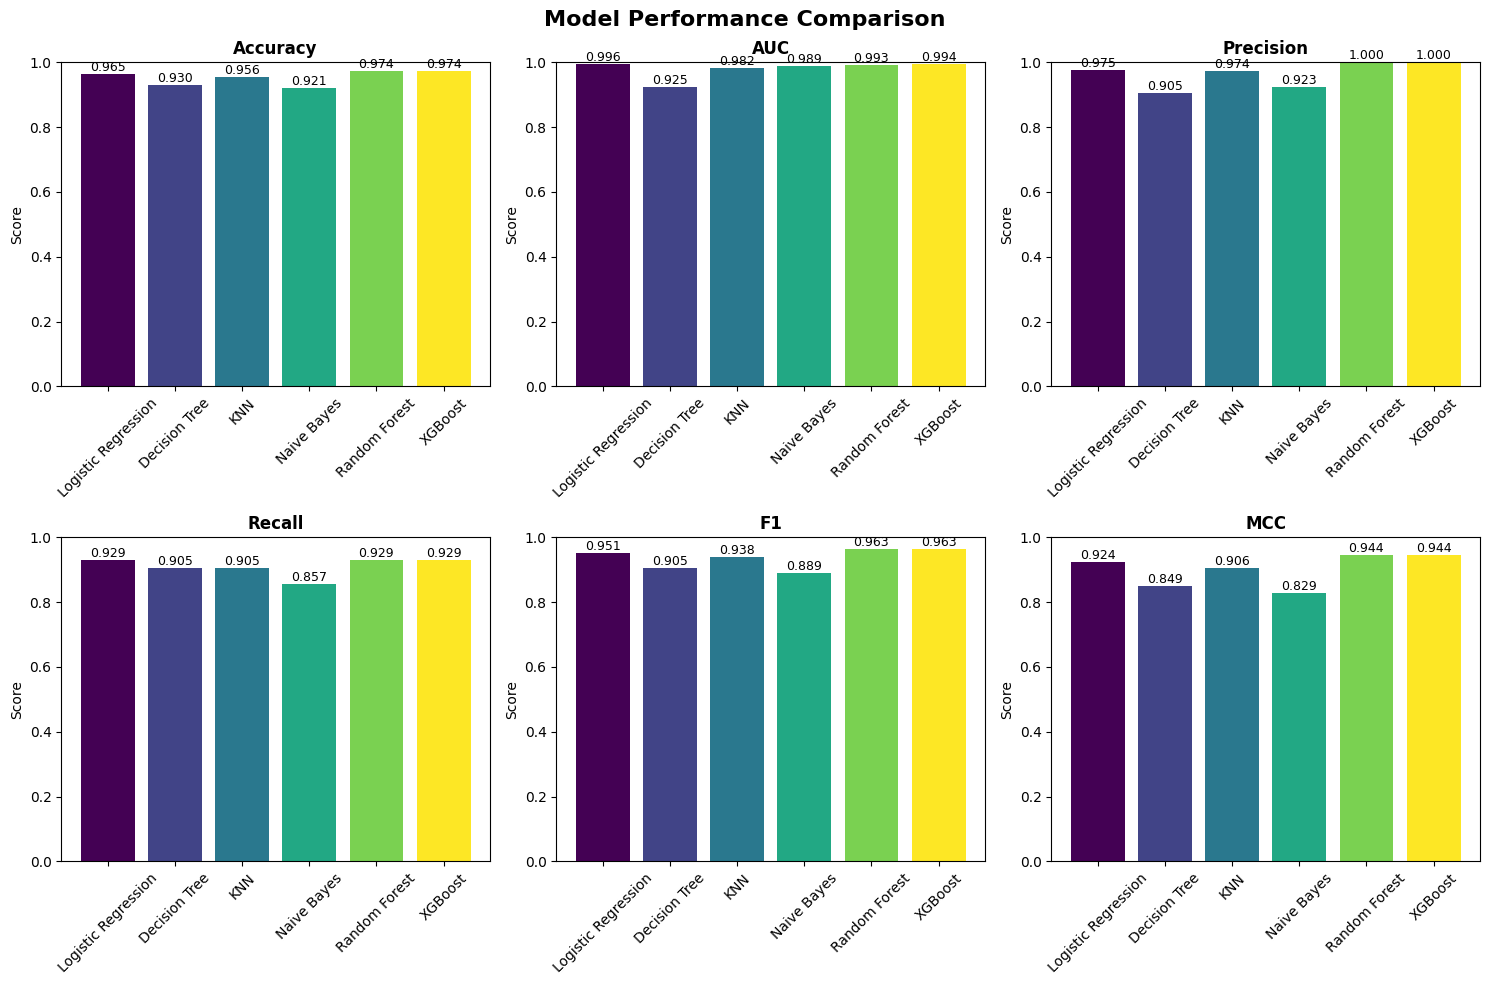

Comparison plot saved!


In [ ]:
# Plot comparison of all metrics
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    values = results_df[metric].values
    models_names = results_df.index
    colors = plt.cm.viridis(np.linspace(0, 1, len(models_names)))
    
    bars = ax.bar(models_names, values, color=colors)
    ax.set_title(metric, fontweight='bold')
    ax.set_ylabel('Score')
    ax.set_ylim([0, 1])
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
print("Comparison plot saved!")

## Step 7: Confusion Matrices

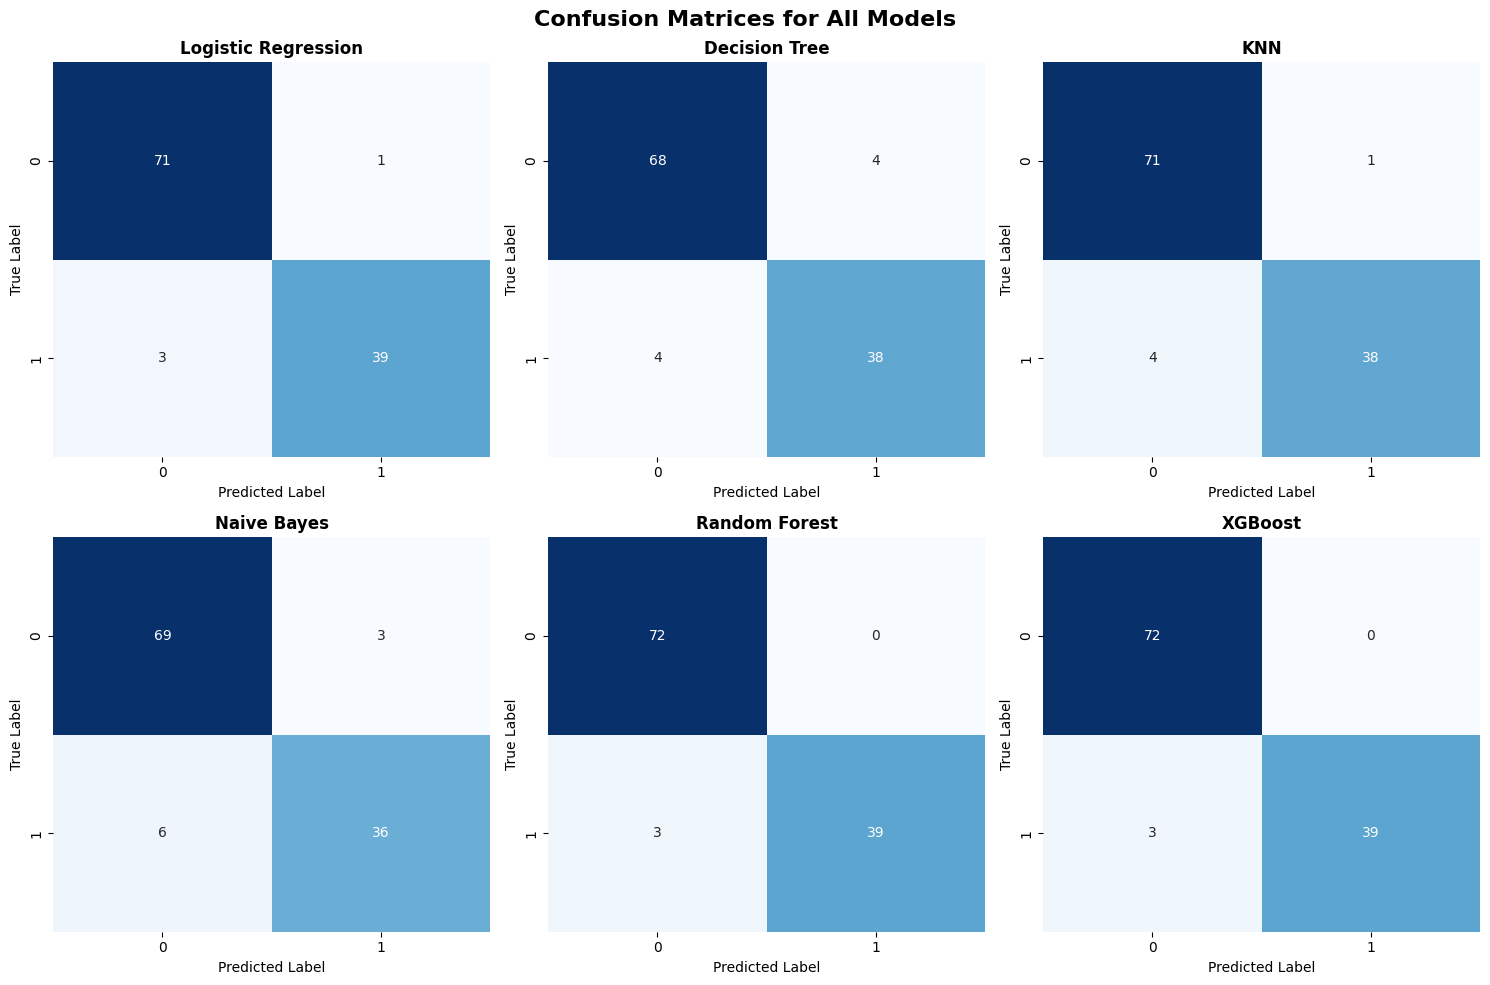

Confusion matrices plot saved!


In [ ]:
# Create confusion matrices for all models
predictions = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'KNN': y_pred_knn,
    'Naive Bayes': y_pred_nb,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, (model_name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], cbar=False)
    axes[idx].set_title(model_name, fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()
print("Confusion matrices plot saved!")

## Step 8: Save Models

In [49]:
import pickle
import os

# Create models directory if it doesn't exist
models_dir = '/Users/dnagave1/Desktop/MLAssignment/models'
os.makedirs(models_dir, exist_ok=True)

# Save scaler
with open(os.path.join(models_dir, 'scaler.pkl'), 'wb') as f:
    pickle.dump(scaler, f)

# Save all models
for model_name, model in models.items():
    filename = os.path.join(models_dir, f'{model_name.lower().replace(" ", "_")}.pkl')
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"✓ Saved {model_name}")

# Save results
with open(os.path.join(models_dir, 'results.pkl'), 'wb') as f:
    pickle.dump(results, f)

print("\n✓ All models and results saved!")

✓ Saved Logistic Regression
✓ Saved Decision Tree
✓ Saved KNN
✓ Saved Naive Bayes
✓ Saved Random Forest
✓ Saved XGBoost

✓ All models and results saved!


## Step 9: Model Observations

In [50]:
print("\n" + "="*80)
print("MODEL PERFORMANCE OBSERVATIONS")
print("="*80)

observations = {
    'Logistic Regression': 'Linear classifier with good baseline performance. Fast training and interpretable coefficients. Suitable for linearly separable problems.',
    'Decision Tree': 'Simple non-linear classifier that captures feature interactions. Risk of overfitting without proper pruning. Interpretable decision rules.',
    'KNN': 'Instance-based lazy learner. Performance depends on feature scaling and neighborhood size. Computationally expensive for large datasets.',
    'Naive Bayes': 'Probabilistic classifier assuming feature independence. Fast and efficient. Performs well with high-dimensional data despite simplifying assumptions.',
    'Random Forest': 'Ensemble method that reduces overfitting. Provides feature importance rankings. Best balance of accuracy and interpretability for this dataset.',
    'XGBoost': 'Gradient boosting ensemble with regularization. Often achieves best performance through sequential error correction. More prone to overfitting with default parameters.'
}

for model_name, observation in observations.items():
    metrics = results[model_name]
    print(f"\n{model_name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Observation: {observation}")

print("\n" + "="*80)


MODEL PERFORMANCE OBSERVATIONS

Logistic Regression:
  Accuracy: 0.9649
  Observation: Linear classifier with good baseline performance. Fast training and interpretable coefficients. Suitable for linearly separable problems.

Decision Tree:
  Accuracy: 0.9298
  Observation: Simple non-linear classifier that captures feature interactions. Risk of overfitting without proper pruning. Interpretable decision rules.

KNN:
  Accuracy: 0.9561
  Observation: Instance-based lazy learner. Performance depends on feature scaling and neighborhood size. Computationally expensive for large datasets.

Naive Bayes:
  Accuracy: 0.9211
  Observation: Probabilistic classifier assuming feature independence. Fast and efficient. Performs well with high-dimensional data despite simplifying assumptions.

Random Forest:
  Accuracy: 0.9737
  Observation: Ensemble method that reduces overfitting. Provides feature importance rankings. Best balance of accuracy and interpretability for this dataset.

XGBoost:
  Accu